# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución
###### _LSPL_
1. Apertura e inspeccion visual para darse una idea general, si los archivos csv cuentan con que tipo de separador csv, nombres de columnas, formato de nombres de columnas, son consistentes en el numero de columnas y sus titulos, asi como reconocimiento de valores vacios, caracteres raros, valores numericos como strings, con caracteres especiales, etc. 
2. Revision general del dataset, verificar el tamaño, columnas y tipos de datos (int, float, string, datetime, etc.). Comprobar que el numero de filas tenga sentido respecto a lo esperado. 
3. Creacion de DataFrames a partir de la lectura de los archivos CSV.
4. Revision de la informacion de los Dataframes, composicion (tamaño), cantidad de valores nulos, dtypes.
5. Documentacion de cada paso, registro de transformaciones realizadas, esto ayuda a mantener la trazabilidad y reproducibilidad.

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Rutas Relativas a los archivos .csv
aisles_path = 'datasets/aisles.csv'
departments_path = 'datasets/departments.csv'
instacart_orders_path = 'datasets/instacart_orders.csv'
order_products_path = 'datasets/order_products.csv'
products_path = 'datasets/products.csv'

# Funcion que da estilo de formato para visualizacion de los DataFrames en Jupyter Notebook 
def zebra_rows(row):
    
    if row.name % 2 == 0:
        return ['background-color: #808080'] * len(row)  # 50% grey
    else:
        return ['background-color: #595959'] * len(row)  # 35% grey

# Funcion para mostrar valores unicos de las columnas de un DataFrame
def columns_unique_values(df):
    
    for col in df.columns:
        print(f"Columna: {col}")
        print(f"Valores únicos: {df[col].unique()} Total valores unicos: {df[col].nunique()}")
        print("-" * 50, '\n')

# Funcion para asignacion de valor <NA> a los valores nulos de un DataFrame
def null_value_apply(df):
    
    null_values = ['', ' ', '-', 'N/A', 'NA', 'NaN', 'nan', 'NULL', 'null', 'None', None]
    
    for col in df.columns:
        
        df[col] = df[col].replace(null_values, pd.NA)
                
    return df

# Funcion para la estandarizacion de valores String (snake_case, lower, strip, eliminacion de guiones medios)
def string_std(df):
        
    for col in df.columns:
            
        if df[col].dtype == 'object':
                
            df[col] = df[col].str.replace('-', '_').str.replace(' ', '_').str.lower().str.strip()
                
    return df

pd.set_option('display.max_rows', 25) # Mostrar 25 filas como máximo
pd.set_option('display.max_columns', 10) # Mostrar 10 columnas como máximo
pd.set_option('display.width', 150) # Mostrar 150 caracteres como máximo

In [3]:
# Leer conjuntos de datos en los DataFrames
df_aisles = pd.read_csv(aisles_path, sep=';', header='infer', keep_default_na=False)
df_departments = pd.read_csv(departments_path, sep=';', header='infer', keep_default_na=False)
df_instacart_orders = pd.read_csv(instacart_orders_path, sep=';', header='infer', keep_default_na=False)
df_order_products = pd.read_csv(order_products_path, sep=';', header='infer', keep_default_na=False)
df_products = pd.read_csv(products_path, sep=';', header='infer', keep_default_na=False)

##### __Nota__ 
###### _LSPL_

Se utilizo _header='infer'_, ya que con la inspeccion visual de los archivos csv se identifico que los archivos contaban con el nombre de las columnas en la primera posicion de las filas.
Se utilizo _keep_default_na=False_, ya que posteriormente se piensa identificar,  modificar los valores nulos y reemplazarlo con el valor nulo pd.NA ya que este maneja tipos de datos mixtos, y operaciones comunes para la identificacion y eliminacion de valores nulos, adicionalmente que trabaja con strings, enteros y booleanos.

##### __Infromacion de los DataFrames__

In [4]:
# Mostrar información del DataFrame
print("*** Aisles DataFrame: \n")
df_aisles.info()
print('*' * 50, '\n')
print("*** Departments DataFrame:\n")
df_departments.info()
print('*' * 50, '\n')
print("*** Instacart Orders DataFrame:\n")
df_instacart_orders.info()
print('*' * 50, '\n')
print("*** Order Products DataFrame:\n")
df_order_products.info()
print('*' * 50, '\n')
print("*** Products DataFrame:\n")
df_products.info()
print('*' * 50, '\n')


*** Aisles DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
************************************************** 

*** Departments DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
************************************************** 

*** Instacart Orders DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------

##### __Nota__
###### _LSPL_
No sera necesario realizar ningun tipo de porcesamiento para el nombre de las columnas ya que estan estandarizadas, con minusculas, usando guion bajo para la separacion de los nombres compuestos (snake_case), no cuentan con espacios ni al inicio ni al final de cada nombre de columna. 

## Conclusiones
###### _LSPL_
El formato y valores del nombre de las columnas no requieren de modificacion.

Para la limpieza o preprocesamiento de valores de los DataFrames requeriran:

- Estandarizacion de formato a snake_case considerando espacion y guiones medios entre strings compuestos.
- Procesamiento de valores NULL
- Eliminacion de valores duplicados
- Procesamiento de valores string a numericos

La mayor parte de los valores de los Dataframe se puede considerar moderadamente correcta, sin mucha dificultad para preprocesarlos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
###### _LSPL_
1. Manejo de valores faltantes: Identificar valores nulos ('', ' ', '-', NaN, None, celdas vacías).

2. Analisis y decision para: Eliminacion filas o columnas con muchos valores faltantes. Reemplazo (con media, mediana, 0's, etc.). Mantener si tienen algún significado.

3. Deteccion de duplicados: Eliminacion filas duplicadas con duplicado explicitos. Revision y correccion para duplicados implicitos (errores tipograficos).

4. Consistencia en los formatos: Asegurar valores de fechas esten en el mismo formato. Estandarizacion de categorias que esten escritas diferente (ej. "Femenino", "femenina", "Mujer" → "F"). Conversion datos a los tipos correctos (str, datetime, int, etc.).

5. Verificacion de codificación y caracteres especiales: Revison de existencia de caracteres raros, espacios ocultos.

6. Documentacion de cada paso: Registro de transformaciones realizadas. Esto ayuda a mantener la trazabilidad y reproducibilidad.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart orders` data frame

In [5]:
# Revisa si hay pedidos duplicados
print("*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_instacart_orders.duplicated().sum()}")
print()
print("DataFrame [Instacart Orders], valores duplicados explicitos: \n") 
df_view = df_instacart_orders.loc[df_instacart_orders.duplicated(keep=False)]
display(df_view.style.apply(zebra_rows, axis=1))



*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 15

DataFrame [Instacart Orders], valores duplicados explicitos: 



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
###### _LSPL_
Se tienen 15 filas duplicadas, las cuales son duplicados explicitos (los valores de la fila para todas las columnas son iguales al de otras filas).
Son pedidos que se hicieron el dia 3 a las 2 am.

In [6]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print("*** DataFrame [Instacart Orders], pedidos realizados el dia 3 a las 2 am: \n")
df_view = df_instacart_orders.loc[(df_instacart_orders['order_hour_of_day'] == 2)  & (df_instacart_orders['order_dow'] == 3), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))
print(f"Numero total de filas: {((df_instacart_orders['order_hour_of_day'] == 2)  & (df_instacart_orders['order_dow'] == 3)).shape[0]}")


*** DataFrame [Instacart Orders], pedidos realizados el dia 3 a las 2 am: 



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
334384,898850,14380,4,3,2,30.0
178949,2677202,134700,2,3,2,6.0
441599,2125197,14050,48,3,2,3.0
321100,408114,68324,4,3,2,18.0
242618,1021560,53767,3,3,2,9.0
68987,1761462,140562,36,3,2,7.0
346889,2291746,40940,7,3,2,3.0
238176,908991,86620,8,3,2,5.0
155154,449909,198005,19,3,2,30.0
468324,222962,54979,59,3,2,3.0


Numero total de filas: 478967


¿Qué sugiere este resultado?

In [7]:
# Elimina los pedidos duplicados explicitos
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)

In [8]:
# Vuelve a verificar si hay filas duplicadas
print("*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_instacart_orders.duplicated().sum()}")

*** DataFrame [Instacart Orders], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [9]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print("*** DataFrame [Instacart Orders], columna 'order_id' cantidad de valores duplicados explicitos:\n")
print(f"Duplicados explicitos: {df_instacart_orders['order_id'].duplicated().sum()}")

*** DataFrame [Instacart Orders], columna 'order_id' cantidad de valores duplicados explicitos:

Duplicados explicitos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos
###### _LSPL_
De 478967 ordenes realizadas el dia 3 a las 2 am, se encontraron 15 filas explicitamente duplicadas, las cuales fueron eliminadas.

### `products` data frame

In [10]:
# Verifica si hay filas totalmente duplicadas
print("*** DataFrame [Products], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_products.duplicated().sum()}")

*** DataFrame [Products], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [11]:
# Revisa únicamente si hay ID de departamentos duplicados
print("*** DataFrame [Products], columna 'department_id' cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_products['department_id'].duplicated().sum()}")


*** DataFrame [Products], columna 'department_id' cantidad de valores duplicados explicitos: 

Duplicados explicitos: 49673


In [12]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print("*** DataFrame [Products], columna 'product_name' cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_products['product_name'].str.upper().duplicated().sum()}")


*** DataFrame [Products], columna 'product_name' cantidad de valores duplicados explicitos: 

Duplicados explicitos: 1361


In [13]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products_missing = pd.read_csv(products_path, sep=';', header='infer', keep_default_na=True)
df_products_missing['product_name'] = df_products_missing['product_name'].fillna('MISSING')

print("*** DataFrame [Products], columna 'product_name' valores duplicados explicitos sin valores ausentes \n")
print(f"Duplicados explicitos (Sin valores ausente): {df_products_missing.loc[df_products_missing['product_name'] != "MISSING", 'product_name'].duplicated().sum()}")
print('*' * 50, '\n')
print("DataFrame [Products], columna 'product_name' valores duplicados explicitos con valores ausentes \n")
print(f"Duplicados explicitos (Con valores ausentes): {df_products_missing.loc[df_products_missing['product_name'] == "MISSING", 'product_name'].duplicated().sum()}")
print('*' * 50, '\n')



*** DataFrame [Products], columna 'product_name' valores duplicados explicitos sin valores ausentes 

Duplicados explicitos (Sin valores ausente): 0
************************************************** 

DataFrame [Products], columna 'product_name' valores duplicados explicitos con valores ausentes 

Duplicados explicitos (Con valores ausentes): 1257
************************************************** 



Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame products, no cuenta con valores duplicados explicitos, sin embargo, cuenta con varios valores ausentes en la columna 'product_name'.
Estos no se eliminaran ya que solo son valores duplicados explicitos en la columna 'product_name', se procesaran mas adelante como valores ausentes.

### `departments` data frame

In [14]:
# Revisa si hay filas totalmente duplicadas
print("*** DataFrame [Departments], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_departments.duplicated().sum()}")

*** DataFrame [Departments], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [15]:
# Revisa únicamente si hay IDs duplicadas de productos
print("*** DataFrame [Products], columna 'department_id' cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_departments['department_id'].duplicated().sum()}")


*** DataFrame [Products], columna 'department_id' cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame departments, no cuenta con valores duplicados explicitos.

### `aisles` data frame

In [16]:
# Revisa si hay filas totalmente duplicadas
print("*** DataFrame [Aisles], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_aisles.duplicated().sum()}")

*** DataFrame [Aisles], cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


In [17]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print("*** DataFrame [Aisles], columna 'aisle_id' cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_aisles['aisle_id'].duplicated().sum()}")

*** DataFrame [Aisles], columna 'aisle_id' cantidad de valores duplicados explicitos: 

Duplicados explicitos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame aisles, no cuenta con valores duplicados explicitos.

### `order_products` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print("*** DataFrame [Order products], cantidad de valores duplicados explicitos: \n")
print(f"Duplicados explicitos: {df_order_products.duplicated().sum()}")

*** DataFrame [Order products], cantidad de valores duplicados explicitos: 



Duplicados explicitos: 0


In [19]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products_missing = pd.read_csv(order_products_path, sep=';', header='infer', keep_default_na=True)
df_order_products_missing['add_to_cart_order'] = df_order_products_missing['add_to_cart_order'].fillna('MISSING')

print("*** DataFrame [Order products], columna 'add_to_cart_order' cantidad de valores duplicados explicitos sin valores ausentes: \n")
print(f"Duplicados (Sin valores ausente): {df_order_products_missing.loc[df_order_products_missing['add_to_cart_order'] != "MISSING", 'add_to_cart_order'].duplicated().sum()}")
print('*' * 50, '\n')
print("*** DataFrame [Order products], columna 'add_to_cart_order' cantidad de valores duplicados explicitos con valores ausentes: \n")
print(f"Duplicados (Con valores ausentes): {df_order_products_missing.loc[df_order_products_missing['add_to_cart_order'] == "MISSING", 'add_to_cart_order'].duplicated().sum()}")
print('*' * 50, '\n')

*** DataFrame [Order products], columna 'add_to_cart_order' cantidad de valores duplicados explicitos sin valores ausentes: 

Duplicados (Sin valores ausente): 4544107
************************************************** 

*** DataFrame [Order products], columna 'add_to_cart_order' cantidad de valores duplicados explicitos con valores ausentes: 

Duplicados (Con valores ausentes): 835
************************************************** 



Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
El DataFrame order_products, cuenta con valores duplicados explicitos no ausentes en la columna 'add_to_cart_order' y ademas cuenta con varios valores ausentes ausentes en la columna 'add_to_cart_order'. Estos no se eliminaran ya que solo son valores duplicados explicitos en la columna 'add_to_cart_order', los valores ausentes se procesaran mas adelante.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

##### __Nota__
###### _LSPL_
Como se uso _df = pd.read_csv('path', sep=';', header='infer',_ __keep_default_na=False__ _)_, los valores NA que son detectados por default por pandas se quedan como texto dentro del DataFrame. Para que despues estos sean procesados como pd.NA. Ya que pd.NA maneja tipos de datos mixtos, y operaciones comunes para la identificacion y eliminacion de valores nulos, adicionalmente que trabaja con strings, enteros y booleanos.

In [20]:
# Mostrar información del DataFrame para posibles valores nulos ('', ' ', '-', 'N/A', 'NA', 'NaN', 'nan', 'NULL', 'null', 'None', None)

print("*** DataFrame [Aisles], valores ausentes por columna: \n")
columns_unique_values(df_aisles)
print()
print("*** DataFrame [Departments], valores ausentes por columna: \n")
columns_unique_values(df_departments)
print()
print("*** DataFrame [Instacart Orders], valores ausentes por columna: \n")
columns_unique_values(df_instacart_orders)
print()
print("*** DataFrame [Order Products], valores ausentes por columna: \n")
columns_unique_values(df_order_products)
print()
print("*** DataFrame [Products], valores ausentes por columna: \n")
columns_unique_values(df_products)

*** DataFrame [Aisles], valores ausentes por columna: 

Columna: aisle_id
Valores únicos: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134] Total valores unicos: 134
-------------------------------------------------- 

Columna: aisle
Valores únicos: ['prepared soups salads' 'specialty cheeses' 'energy granola bars'
 'instant foods' 'marinades meat preparation' 'other' 'packaged meat'
 'bakery desserts' 'pasta sauce' 'kitchen supplies' 'cold flu allergy'
 'fresh pasta' 'prepared meals' 'tofu meat alte

In [21]:
# Identificacion y correcion de valores Null a pd.NA

# Se llama a la funcion 'def null_value_apply(df)' para el reemplazo de valores ausentes por pd.NA
null_value_apply(df_aisles)
null_value_apply(df_departments)
null_value_apply(df_instacart_orders)
null_value_apply(df_order_products)
null_value_apply(df_products)

# Mostrar cantidad de valores ausentes en formato pd:NA
print("*** DataFrame [Aisle], cantidad de valores ausentes <NA>: \n", df_aisles.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Departments], cantidad de valores ausentes <NA>: \n", df_departments.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Instacart orders], cantidad de valores ausentes <NA>:\n", df_instacart_orders.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Order products], cantidad de valores ausentes <NA>: \n", df_order_products.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Products], cantidad de valores ausentes <NA>: \n", df_products.isna().sum())
print('*' * 50, '\n')
print()


print("*** DataFrame [Instacart Orders], valores ausentes debidamene identificados como <NA>: \n")
# Llamada a la funcion 'def columns_unique_values(df)' para mostrar los valores unicos de las columnas del DataFrame 
columns_unique_values(df_instacart_orders)
print("Data Frame [Instacart orders], cantidad de valores ausentes: \n", df_instacart_orders.isna().sum())
print('*' * 50, '\n')
print()

print("*** DataFrame [Order Products], valores ausentes debidamene identificados como <NA>:  \n")
# Llamada a la funcion 'def columns_unique_values(df)' para mostrar los valores unicos de las columnas del DataFrame 
columns_unique_values(df_order_products)
print()
print("Data Frame [Order Products], cantidad de valores ausentes: \n", df_order_products.isna().sum())
print('*' * 50, '\n')
print()

print("*** DataFrame [Products], valores ausentes debidamene identificados como <NA>:: \n")
# Llamada a la funcion 'def columns_unique_values(df)' para mostrar los valores unicos de las columnas del DataFrame 
columns_unique_values(df_products)
print("Data Frame [Products], cantidad de valores ausentes: \n", df_products.isna().sum())
print('*' * 50, '\n')

*** DataFrame [Aisle], cantidad de valores ausentes <NA>: 
 aisle_id    0
aisle       0
dtype: int64
************************************************** 

Data Frame [Departments], cantidad de valores ausentes <NA>: 
 department_id    0
department       0
dtype: int64
************************************************** 

Data Frame [Instacart orders], cantidad de valores ausentes <NA>:
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
************************************************** 

Data Frame [Order products], cantidad de valores ausentes <NA>: 
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
************************************************** 

Data Frame [Products], cantidad de valores ausentes <NA>: 
 product_id          0
product_name     1258
aisle_id          

##### __Nota__
###### _LSPL_
Valores ausentes en:

Data Frame [Instacart orders], columna 'days_since_prior_order'

Data Frame [Order products], columna 'add_to_cart_order'

Data Frame [Products], columna 'product_name'


### `products` data frame

In [22]:
# Encuentra los valores ausentes en la columna 'product_name'
print("*** DataFrame [Products], columna 'product_name' valores ausentes debidamene identificados como <NA>: ")
print(df_products['product_name'].value_counts(dropna=False))
print()
df_view = df_products.loc[df_products['product_name'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Products], columna 'product_name' valores ausentes debidamene identificados como <NA>: 
product_name
<NA>                                                                 1258
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce       1
Green Chile Anytime Sauce                                               1
Porto                                                                   1
Small & Medium Dental Dog Treats                                        1
                                                                     ... 
HIGH PERFORMANCE ENERGY DRINK                                           1
ORIGINAL PANCAKE & WAFFLE MIX                                           1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                         1
SPRING WATER BODY WASH                                                  1
Robust Golden Unsweetened Oolong Tea                                    1
Name: count, Length: 48437, dtype: int64



,product_id,product_name,aisle_id,department_id
9061,9062,,100,21
34013,34014,,100,21
2197,2198,,100,21
10327,10328,,100,21
6018,6019,,100,21
41283,41284,,100,21
25401,25402,,100,21
3439,3440,,100,21
17064,17065,,100,21
23119,23120,,100,21


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
De acuerdo a la busqueda de valores ausentes y al muestreo de las filas con valores ausentes en DataFrame [Products], columna 'product_name' confirmamos la existen 1258 valores ausentes

In [23]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_view = df_products.loc[(df_products['product_name'].isna()) & (df_products['aisle_id'] != 100), :]

if len(df_view) != 0:
    print(df_view.sample(25).style.apply(zebra_rows, axis=1))
else:
    print("No hay filas con valores nulos en columna 'aisle_id' diferente a 100")

No hay filas con valores nulos en columna 'aisle_id' diferente a 100


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
De acuerdo a la busqueda de valores ausentes y al muestreo de las filas con valores ausentes en DataFrame [Products], columna 'product_name' confirmamos que no existen valores ausentes fuera del pasillo 100.

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_view = df_products.loc[(df_products['product_name'].isna()) & (df_products['department_id'] != 21), :]

if len(df_view) != 0:
    print(df_view.sample(25).style.apply(zebra_rows, axis=1))
else:
    print("No hay filas con valores nulos en columna 'department_id' diferente a 21")

No hay filas con valores nulos en columna 'department_id' diferente a 21


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
De acuerdo a la busqueda de valores ausentes y al muestreo de las filas con valores ausentes en DataFrame [Products], columna 'productname' confirmamos que no existen valores ausentes fuera del departamento 21.

In [25]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# LSPL
# Ya fue mostrado previamente en la vista resultante de la indexacion booleana df_products['product_name'].isna()

Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
Al parecer Instacart_orders usa el departamento_ID 21 y pasillo 100, para productos que no tienen nombre, aun cuando tienen un id de producto. Esto se podria confirmarse con Instacart para saber si estos productos son reelevantes, si podrian identificarse de alguna manera para poder corregir el nombre y aquellos que no se puedan identificar, eliminarlos. Mientras tanto se identificaran con el valor 'Unknown'.

In [26]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print("*** DataFrame [Products], columna 'product_name' valores ausentes reemplazados por 'Unknown': ")
df_products['product_name'].value_counts(dropna=False)

*** DataFrame [Products], columna 'product_name' valores ausentes reemplazados por 'Unknown': 


product_name
Unknown                                                              1258
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce       1
Green Chile Anytime Sauce                                               1
Porto                                                                   1
Small & Medium Dental Dog Treats                                        1
                                                                     ... 
HIGH PERFORMANCE ENERGY DRINK                                           1
ORIGINAL PANCAKE & WAFFLE MIX                                           1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                         1
SPRING WATER BODY WASH                                                  1
Robust Golden Unsweetened Oolong Tea                                    1
Name: count, Length: 48437, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_

Se encontraron en DataFrame [Products], columna 'product_name' 1258 valores ausentes, los cuales se reemplazaron por 'Unknown'. 

### `instacart orders` data frame

In [27]:
# Encuentra los valores ausentes
print("*** DataFrame [Instacart orders], columna 'days_since_prior_order' valores ausentes debidamene identificados como <NA>: ")
print(df_instacart_orders['days_since_prior_order'].value_counts(dropna=False), "\n")
print("Valores ausentes: ", df_instacart_orders['days_since_prior_order'].isna().sum())
print()
df_view = df_instacart_orders.loc[df_instacart_orders['days_since_prior_order'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Instacart orders], columna 'days_since_prior_order' valores ausentes debidamene identificados como <NA>: 
days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
        ...  
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: count, Length: 32, dtype: int64 

Valores ausentes:  28817



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
428491,995396,83424,1,0,10,
421514,2307877,183105,1,1,11,
346994,1809376,5096,1,1,16,
100009,2843265,140041,1,6,12,
219481,357523,139280,1,5,9,
276800,808912,102344,1,3,17,
433674,2086424,156345,1,3,15,
103380,2579635,99407,1,2,9,
285137,629681,53167,1,1,11,
457161,2714175,121587,1,2,9,


In [28]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Filtrar los pedidos que no son el primer pedido
df_orders_wo_first_order = df_instacart_orders.loc[df_instacart_orders['order_number'] != 1, :]
# Buscar si hay valores ausentes en columna 'days_since_prior_order'
null_values = df_orders_wo_first_order['days_since_prior_order'].isna().any()
print("Existen valores ausentes que no sean el primer pedido: ", null_values)

Existen valores ausentes que no sean el primer pedido:  False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
Se identificaron 28817 valores ausentes en la columna 'days_since_prior_order', se identifico que los valores ausentes en dicha columna ocurrian solamente durante el primer numero de orden; los valores en la columna 'days_since_prior_order' pueden tener valores ausentes, si es el primer pedido porque el primer pedido no tiene pedido anterior, pero no deberian tener valores ausentes si no es el primer pedido. Por lo que estos valores ausentes son esperados y no deberian modificarse por que cumplen con la logica del negocio.

### `order_products` data frame

In [29]:
# Encuentra los valores ausentes
print("*** DataFrame [Order products], columna 'add_to_cart_order' valores ausentes debidamene identificados como <NA>: ")
print(df_order_products['add_to_cart_order'].value_counts(dropna=False), "\n")
print("Valores ausentes: ", df_order_products['add_to_cart_order'].isna().sum())
print()
df_view = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Order products], columna 'add_to_cart_order' valores ausentes debidamene identificados como <NA>: 
add_to_cart_order
1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
         ...  
60.0       127
61.0       114
62.0        98
63.0        87
64.0        75
Name: count, Length: 65, dtype: int64 

Valores ausentes:  836



,order_id,product_id,add_to_cart_order,reordered
2334863,813364,39877,,0
719863,388234,26606,,0
1000255,1832957,11777,,1
2478283,404157,28535,,1
4270574,1717990,13712,,1
182090,2256933,13457,,1
829277,1673227,11193,,0
2693183,871281,33787,,1
1877956,61355,8615,,0
2165935,1386261,8133,,0


In [30]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
for column in df_order_products:
    
    if column != 'add_to_cart_order':
        print(f"Valor minimo para columna {column}: {df_order_products[column].min()}, Valor maximo para columna {column}: {df_order_products[column].max()}")

Valor minimo para columna order_id: 4, Valor maximo para columna order_id: 3421079
Valor minimo para columna product_id: 1, Valor maximo para columna product_id: 49694
Valor minimo para columna reordered: 0, Valor maximo para columna reordered: 1


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_

Se encontraron en DataFrame [Order products], columna 'add_to_cart_order' 836 valores ausentes, el valor minio para los id de ordenes es 4.

In [31]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ordr_ids = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), 'order_id'].unique()
print(ordr_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [32]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_op_na = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), :]

print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?", (df_op_na.groupby('order_id')['product_id'].count() > 64).all())
print()

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
df_oid_na = df_op_na.groupby('order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print("Cantidades de productos en cada pedido con valores ausentes en columna 'add_to_cart_order': \n", df_oid_na['product_id'].count())

¿Todos los pedidos con valores ausentes tienen más de 64 productos? False

Cantidades de productos en cada pedido con valores ausentes en columna 'add_to_cart_order': 
 order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.
###### _LSPL_
No encuentro una lógica de negocio directa entre esas columnas basandose solo en la informacion analizada, los valores ausentes en la columna 'add_to_cart_order', podrian significar que el dato no fue capturado correctamente, el pedido fue generado de otra forma(reordenado automatico), o un error en el sistema.

In [33]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = pd.to_numeric(df_order_products['add_to_cart_order'], errors='coerce').fillna(999).astype('int64')
print("*** DataFrame [Order products], columna 'add_to_cart_order' tipo de datos: ", df_order_products['add_to_cart_order'].dtypes)
print()
print("DataFrame [Order products], columna 'add_to_cart_order' valores unicos: \n", df_order_products['add_to_cart_order'].unique())

*** DataFrame [Order products], columna 'add_to_cart_order' tipo de datos:  int64

DataFrame [Order products], columna 'add_to_cart_order' valores unicos: 
 [ 17   1  35   5   4  10  14   2  28   3  16   8   7   6   9  15  22  49
  19  13  11  12  18  24  23  45  30  31  29  21  38  20  57  58  26  25
  39  34  40  27 999  43  33  42  50  32  36  37  61  46  56  41  44  55
  54  47  63  48  60  62  53  59  52  51  64]


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### _LSPL_
Se identificaron 836 valores ausentes en la columna 'add_to_cart_order', La cantidad de productos con valores ausentes no tiene una relacion directa entre cantidad de productos y ausencia en 'add_to_cart_order', el hecho de que tengan pocos o muchos productos no depend si 'add_to_cart_order' contenga valores ausentes o no. Podrian faltar otras variables externas: ¿cómo se hizo el pedido? ¿por app? ¿por web? ¿por reorden automático? ¿por asistencia?

##### __Nota__
###### _LSPL_
Adicionalmente me permito corregir lo siguiente:

Se encontraron strings con espacios en nombres compuestos, estandarizar formato a snake_case.
- DataFrame [Aisles] columna 'aisle'
- DataFrame [Departments] columna 'departmen'

Se encontraron valores cuantitativos como categoricos, convertirlos a tipo numeric
- DataFrame [Instacart orders] columna 'days_since_prior_order' 

Se encontraron strings con espacios y '-' en nombres compuestos, estandarizar formato a snake_case.
- DataFrame [Products] columna 'product_name'


In [34]:
# Estandarizacion de formato de valores string para cada columna de los DataFrames que sen de dType 'object'
# Se llama la funicion def string_std(df) para el procesamiento de los valores string para aplicar formato
df_aisles = string_std(df_aisles)
df_departments = string_std(df_departments)
df_products = string_std(df_products)

display(df_aisles.sample(25).style.apply(zebra_rows, axis=1))
print()
display(df_departments.head(25).style.apply(zebra_rows, axis=1))
print()
display(df_products.sample(25).style.apply(zebra_rows, axis=1))

# Validar si  DataFrame [instacart orders] columna 'days_since_prior_order' contiene valores numericos u objeto
print(f"DataFrame [Instacart orders] columna 'days_since_prior_order' dtypes: {df_instacart_orders.dtypes}\n")
print(df_instacart_orders['days_since_prior_order'].unique())
print()
df_instacart_orders['days_since_prior_order'] = pd.to_numeric(df_instacart_orders['days_since_prior_order'], errors='coerce')
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].fillna(0)
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].astype('int64')
print(df_instacart_orders['days_since_prior_order'].unique())


,aisle_id,aisle
57,58,frozen_breads_doughs
17,18,bulk_dried_fruits_vegetables
119,120,yogurt
61,62,white_wines
110,111,plates_bowls_cups_flatware
33,34,frozen_meat_seafood
59,60,trash_bags_liners
15,16,fresh_herbs
103,104,spices_seasonings
133,134,specialty_wines_champagnes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry_goods_pasta
9,10,bulk


,product_id,product_name,aisle_id,department_id
13630,13631,bacon_cheddar_beef_burger,122,12
28849,28850,healthy_request_chicken_with_mini_round_noodles_soup,69,15
1602,1603,chocolate_fudge_ice_cream_bars,37,1
5876,5877,organic_rose_maqui_&_cocao_bar,45,19
39340,39341,organic_greek_seasoning,104,13
5677,5678,deil_style_kosher_dill_relish,72,13
48214,48215,diet_cranberry_with_lime_juice,98,7
44388,44389,gluten_free_original_baguettes,58,1
30341,30342,ultra_orginal_concentrated_dish_liquid,74,17
7965,7966,complete_multi_benefit_extra_white_scope_outlast,20,11


DataFrame [Instacart orders] columna 'days_since_prior_order' dtypes: order_id                   int64
user_id                    int64
order_number               int64
order_dow                  int64
order_hour_of_day          int64
days_since_prior_order    object
dtype: object

['30.0' '9.0' '2.0' '10.0' '17.0' '15.0' '22.0' '4.0' '8.0' '3.0' '12.0'
 '11.0' '7.0' '1.0' '5.0' '6.0' '14.0' <NA> '20.0' '16.0' '24.0' '23.0'
 '27.0' '13.0' '0.0' '28.0' '21.0' '25.0' '19.0' '18.0' '29.0' '26.0']

[30  9  2 10 17 15 22  4  8  3 12 11  7  1  5  6 14  0 20 16 24 23 27 13
 28 21 25 19 18 29 26]


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
###### _LSPL_
La limpieza de datos representa una etapa crítica en cualquier proyecto de análisis o ciencia de datos, ya que establece la base sobre la cual se realizarán todas las interpretaciones y decisiones posteriores. Gestionar valores ausentes, asegurar la correcta tipificación de datos cuantitativos y categóricos, y eliminar duplicados explícitos e implícitos son tareas fundamentales que permiten construir datasets sólidos y confiables.
Un análisis basado en datos sucios genera resultados erróneos; un análisis sobre datos limpios produce conclusiones precisas, útiles y defendibles.
La calidad del análisis es tan buena como la calidad de los datos en los que se basa.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(f"Valor minimo de DataFrame [Instacart orders], columna 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].min()}")
print(f"Valor maximo de DataFrame [Instacart orders], columna 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].max()}")
print(f"Valores DataFrame [Instacart orders], columna 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].unique()}")
print()
print(f"Valor minimo de DataFrame [Instacart orders], columna 'order_dow': {df_instacart_orders['order_dow'].min()}")
print(f"Valor maximo de DataFrame [Instacart orders], columna 'order_dow': {df_instacart_orders['order_dow'].max()}")
print(f"Valores DataFrame [Instacart orders], columna 'order_dow': {df_instacart_orders['order_dow'].unique()}")

Valor minimo de DataFrame [Instacart orders], columna 'order_hour_of_day': 0
Valor maximo de DataFrame [Instacart orders], columna 'order_hour_of_day': 23
Valores DataFrame [Instacart orders], columna 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]

Valor minimo de DataFrame [Instacart orders], columna 'order_dow': 0
Valor maximo de DataFrame [Instacart orders], columna 'order_dow': 6
Valores DataFrame [Instacart orders], columna 'order_dow': [6 5 0 4 3 1 2]


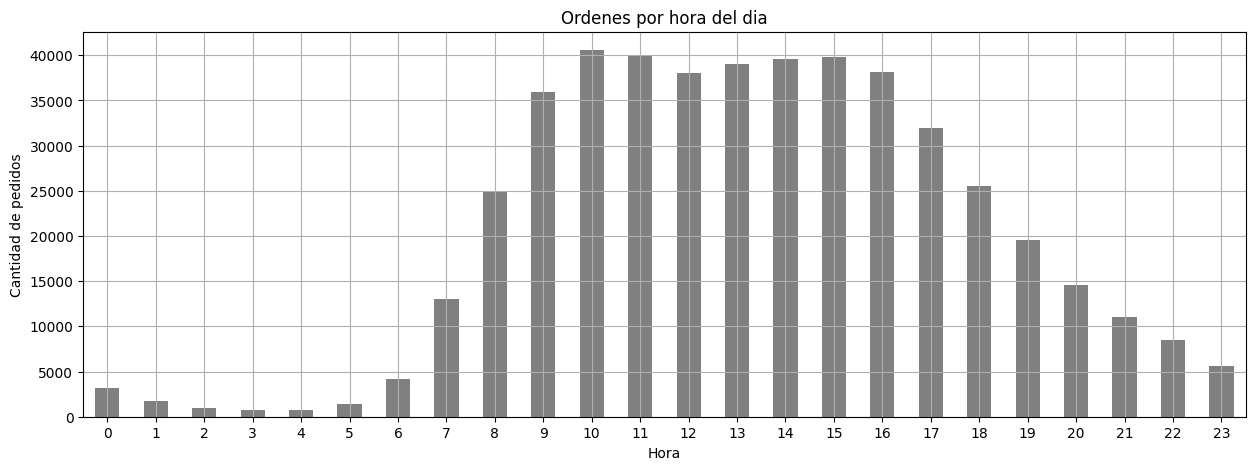

In [36]:
df_orders_by_hour = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count()
df_orders_by_hour.plot(kind='bar', 
                       title='Ordenes por hora del dia', 
                       xlabel="Hora", 
                       ylabel="Cantidad de pedidos", 
                       grid=True, 
                       rot=0, 
                       figsize=[15, 5], 
                       color='grey')

plt.show()

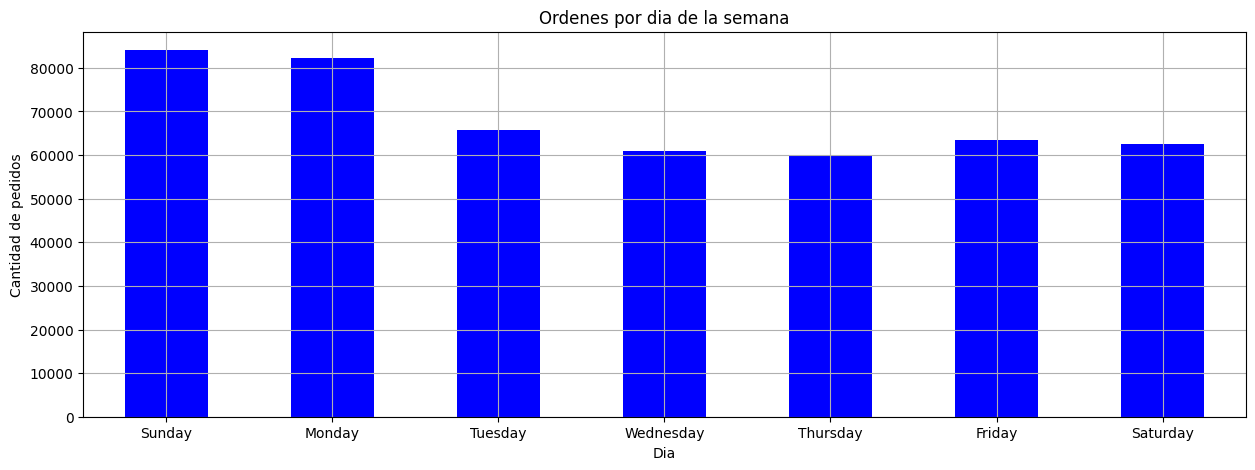

In [37]:
df_orders_by_day = df_instacart_orders.groupby('order_dow')['order_id'].count()
df_orders_by_day.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_orders_by_day.plot(kind='bar', 
                       title='Ordenes por dia de la semana', 
                       xlabel="Dia", 
                       ylabel="Cantidad de pedidos", 
                       grid=True, 
                       rot=0, 
                       figsize=[15, 5], 
                       color='blue')

plt.show()

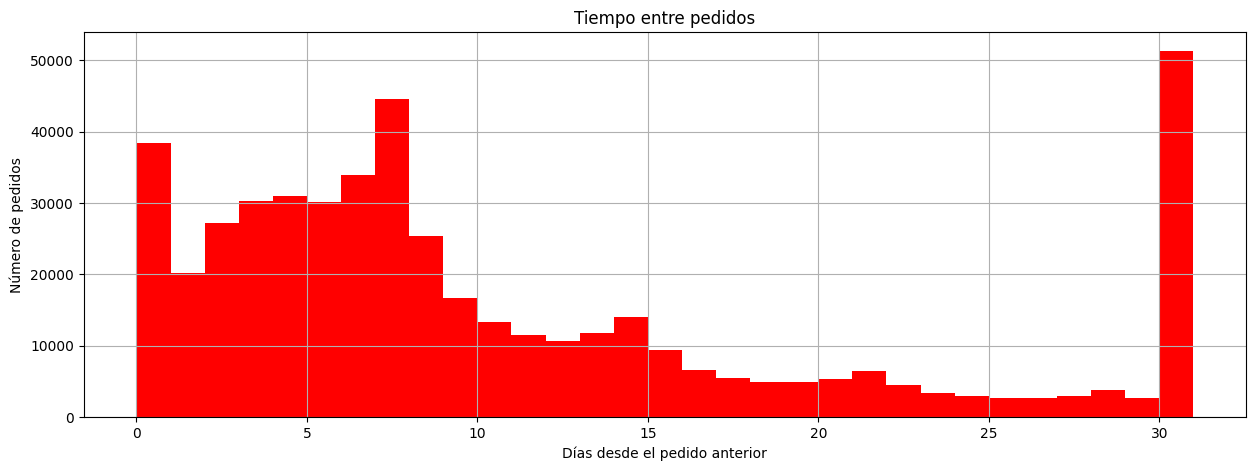

In [38]:

df_instacart_orders.hist(column='days_since_prior_order', 
                         bins=range(0, df_instacart_orders['days_since_prior_order'].max()+2),
                         grid=True,
                         figsize=[15, 5], 
                         color='red')
plt.title('Tiempo entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.show()

Escribe aquí tus conclusiones
###### _LSPL_
- Para la creacion de graficas número de personas que hacen pedidos dependiendo de la hora del día y día de la semana la gente hace sus compras.
Se escogio grafico de barras vertical, porque permite identificar comportamientos de usuarios en función de la hora o el dia.

__Nota__ para la grafica de los dias de la semana, de acuerdo a las costumbres norte americanas, los dias de la semana inician los Domingos, por lo que el valor 0 seria para el Domingo.

- Para la creacion de graficas que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, se escogio el histograma, ya que muestra distribución de frecuencias, cuántas personas esperaron 1 día, 2 días, 3 días, etc.



### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [39]:
print(df_orders_by_hour)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
###### _LSPL_

Hora en que se generan mas ordenes es a las 10 am. De 07 am a 09 pm es el horario regular de generacion de ordenes (por arriba de las 10K ordenes). 10 pm a 06 am es el periodo de tiempo con ventas mas bajas debido a las horas de descanso de las personas (por debajo de las 10K ordenes).

### [A3] ¿Qué día de la semana compran víveres las personas?

In [40]:
print(df_orders_by_day)
print()
print(f"El día de la semana con más pedidos: {df_orders_by_day.idxmax()}")

Sunday       84090
Monday       82185
Tuesday      65833
Wednesday    60897
Thursday     59810
Friday       63488
Saturday     62649
Name: order_id, dtype: int64

El día de la semana con más pedidos: Sunday


Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [41]:
print(f"Valor mínimo de días de espera: {df_instacart_orders['days_since_prior_order'].min()}")
print(f"Valor máximo de días de espera: {df_instacart_orders['days_since_prior_order'].max()}")

Valor mínimo de días de espera: 0
Valor máximo de días de espera: 30


Escribe aquí tus conclusiones
###### _LSPL_
Valor mínimo: 0 días, generado por valores ausentes, lo cual indica que existen en aquellos dias en los que los usuarios compraron ese mismo dia.

Valor máximo: probablemente 30 días → muchos usuarios programan sus pedidos mensualmente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [42]:
df_wnd_sat = df_instacart_orders[df_instacart_orders['order_dow'].isin([3, 6])]
display(df_wnd_sat.sample(25).style.apply(zebra_rows, axis=1))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
382091,3414488,46310,2,6,15,5
51406,147428,76882,1,6,14,0
156729,2766089,192672,3,6,15,13
307836,623816,140514,13,3,14,30
357831,1034883,35799,16,3,16,4
366189,1432591,18085,14,3,14,1
464973,2071048,68773,2,3,10,30
276597,2262666,199096,2,6,16,14
204387,2768305,6015,37,6,14,6
451998,2993191,40548,11,3,18,3


In [43]:
# Filtrar solo miércoles y sábado
df_dy_hr = df_wnd_sat.pivot_table(index='order_hour_of_day',
                                  columns='order_dow',
                                  values='order_id',
                                  aggfunc='count')
display(df_dy_hr.head(25).style.apply(zebra_rows, axis=1))


order_dow,3,6
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


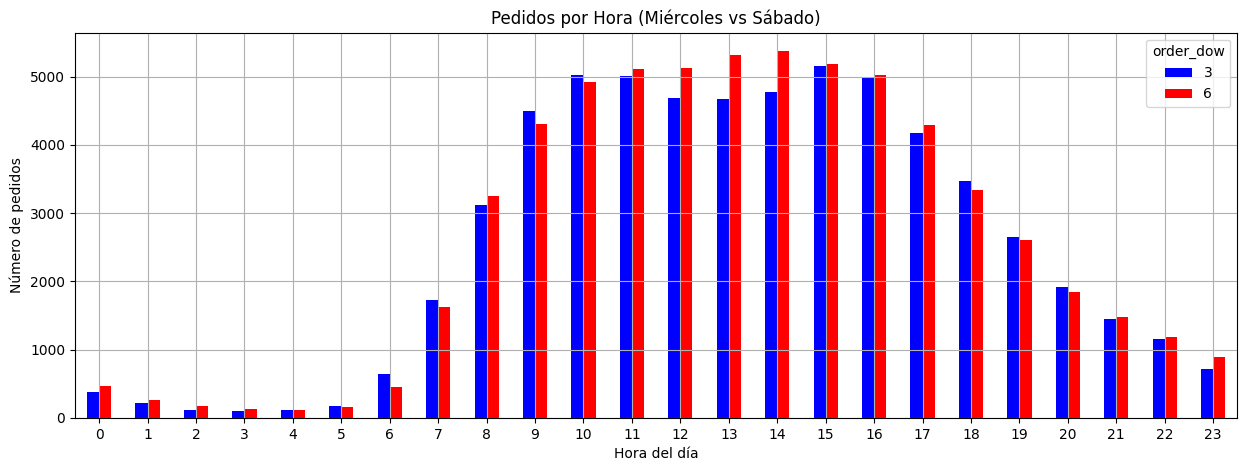

In [44]:
df_dy_hr.plot(kind='bar',
              title='Pedidos por Hora (Miércoles vs Sábado)',
              xlabel='Hora del día',
              ylabel='Número de pedidos',
              grid=True,
              rot=0,
              figsize=[15, 5],
              color=['blue', 'red'])

plt.show()

Escribe aquí tus conclusiones
###### _LSPL_

Existen ciertas diferencias en la distribucion de los pedidos por hora para Miercoles y Sabados.

Miercoles:

- Hora en que se generan mas ordenes es a las 03 pm. De 07 am a 10 pm es el horario regular de generacion de ordenes (por arriba de las 10K ordenes). 11 pm a 06 am es el periodo de tiempo con ventas mas bajas debido a las horas de descanso de las personas (por debajo de las 10K ordenes). Incluso se puede ver una caida de ordenes entre las 12 y las 02 pm.

- Hora en que se generan mas ordenes es a las 02 pm. De 07 am a 10 pm es el horario regular de generacion de ordenes (por arriba de las 10K ordenes). 11 pm a 06 am es el periodo de tiempo con ventas mas bajas debido a las horas de descanso de las personas (por debajo de las 10K ordenes). Los sabados no presentan caidas en el numero de ordenes durante el dia. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
# contar cuántos pedidos ha hecho cada usuario
user_orders = df_instacart_orders['user_id'].value_counts()
print(f"Cantidad de pedidos por cada usuario: \n {user_orders}")
print()

# Contamos cuántos usuarios hay para cada cantidad de pedidos
user_per_amount_orders = user_orders.value_counts().sort_index()
print(f"Numero de clientes por cantidad de pedidos: \n{user_per_amount_orders}")

Cantidad de pedidos por cada usuario: 
 user_id
149605    28
193164    26
78375     25
134511    24
148162    24
          ..
73221      1
112002     1
82546      1
60017      1
133649     1
Name: count, Length: 157437, dtype: int64

Numero de clientes por cantidad de pedidos: 
count
1     55357
2     36508
3     21547
4     13498
5      8777
      ...  
23       19
24        3
25        1
26        1
28        1
Name: count, Length: 27, dtype: int64


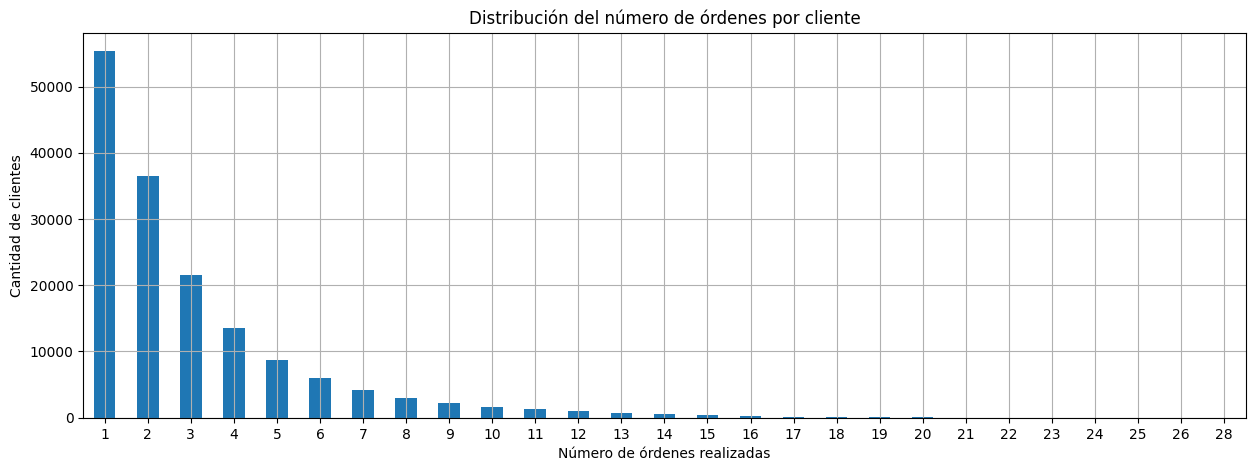

In [46]:
user_per_amount_orders.plot(
    kind='bar',
    title='Distribución del número de órdenes por cliente',
    xlabel='Número de órdenes realizadas',
    ylabel='Cantidad de clientes',
    grid=True,
    figsize=[15,5],
    rot=0)

plt.show()

Escribe aquí tus conclusiones
###### _LSPL_
Se puede visualizar la tendencia del numero de compras que hacen la mayor parte de los clientes, muchos clientes compran una sola vez o hacen pocos pedidos, y pocos clientes son los que hacen muchos pedidos.


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
# Contar cuántas veces se pidió cada producto
df_most_ordered_products = df_order_products['product_id'].value_counts().reset_index()
df_most_ordered_products.columns = ['product_id', 'order_amounts']

display(df_most_ordered_products.sample(25).style.apply(zebra_rows, axis=1))

,product_id,order_amounts
41111,27559,1
414,43504,1592
37324,3138,2
27291,2199,7
1222,20327,641
1822,343,438
17153,15795,20
29884,34426,5
23907,29278,9
33700,16256,3


In [48]:
# Unir con el DataFrame de productos para traer el nombre
df_top_prods = df_most_ordered_products.merge(df_products, on='product_id', how='left')

display(df_top_prods.sample(25).style.apply(zebra_rows, axis=1))

,product_id,order_amounts,product_name,aisle_id,department_id
22369,41441,11,vanilla_marshmallows,8,3
19230,24018,15,pearl_plastic_applicator_super_plus_absorbency_scented_tampons,126,11
32047,20799,4,thai_vegetable_peanut,4,9
14468,42890,28,g_series_fierce_grape_sports_drink,64,7
13460,16594,32,indicator_contour_clean_soft_toothbrush,20,11
17170,8824,20,moist_supreme_premium_devil's_food_cake_mix,105,13
32585,23164,4,rosemary_bath_&_shower_gel,25,11
17407,16853,19,organic_pink_ruby_grapefruit,24,4
4718,45154,153,pure_&_smooth_green_tea,94,7
39836,12851,2,coconut_cookies,61,19


In [49]:
df_top_twenty = df_top_prods[['product_id', 'product_name', 'order_amounts']]

display(df_top_twenty.head(25).style.apply(zebra_rows, axis=1))

,product_id,product_name,order_amounts
0,24852,banana,66050
1,13176,bag_of_organic_bananas,53297
2,21137,organic_strawberries,37039
3,21903,organic_baby_spinach,33971
4,47209,organic_hass_avocado,29773
5,47766,organic_avocado,24689
6,47626,large_lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic_whole_milk,19600


Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [108]:
items_per_order = df_order_products.groupby('order_id').size()

print("Numero de artículos por pedido: \n",items_per_order.sample(25))


Numero de artículos por pedido: 
 order_id
2910608     2
430961     18
625622     21
1052144     4
2400644    29
2804521     6
195317     44
3070361    35
3073814    11
1209535    23
788598      1
1342224    19
2916580    14
3100458    12
2315323     6
384042      4
1162277    25
1395881     6
3044955     3
1516211    12
2289670     6
519070      6
3017645    12
718594      9
100901      5
dtype: int64


In [109]:
print("Estadisticas de objetos por orden: \n", items_per_order.describe())


Estadisticas de objetos por orden: 
 count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


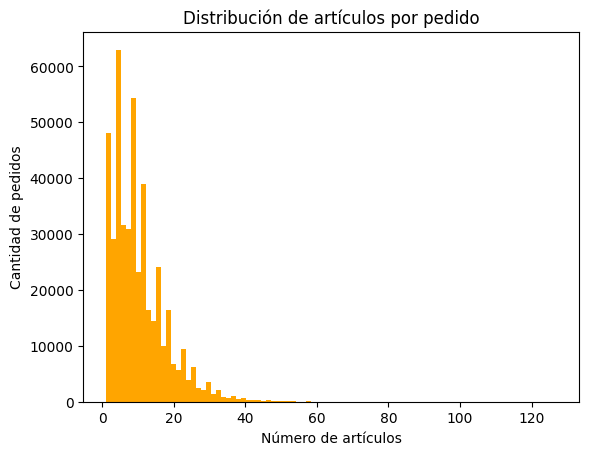

In [62]:
plt.hist(items_per_order, bins=90, color='orange')
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos')
plt.ylabel('Cantidad de pedidos')
plt.show()

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [68]:
df_reordered_products = df_order_products[df_order_products['reordered'] == 1]
display(df_reordered_products.sample(25).style.apply(zebra_rows, axis=1))

,order_id,product_id,add_to_cart_order,reordered
659346,82170,32184,7,1
3502286,239402,20842,3,1
3601038,3359621,5785,6,1
4526722,3067676,30266,4,1
2819804,1602434,26104,1,1
3648252,3223330,10339,5,1
2981588,2521617,2005,6,1
2793661,99457,29487,12,1
743305,2067897,38205,5,1
921890,286404,22935,7,1


In [110]:
top_20_ro = df_reordered_products['product_id'].value_counts().head(20)
print("Top 20 productos vueltos a ordenar: ", df_top_20_ro)

Top 20 productos vueltos a ordenar:  product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64


In [112]:
# Cruzar IDs con nombres
df_top_20_names = top_20_ro.to_frame(name='reorder_count').merge(df_products[['product_id', 'product_name']],
                                                                          left_index=True,right_on='product_id')
print(df_top_20_names[['product_id', 'product_name', 'reorder_count']])

       product_id              product_name  reorder_count
24851       24852                    banana          55763
13175       13176    bag_of_organic_bananas          44450
21136       21137      organic_strawberries          28639
21902       21903      organic_baby_spinach          26233
47208       47209      organic_hass_avocado          23629
47765       47766           organic_avocado          18743
27844       27845        organic_whole_milk          16251
47625       47626               large_lemon          15044
27965       27966       organic_raspberries          14748
16796       16797              strawberries          13945
26208       26209                     limes          13327
22934       22935      organic_yellow_onion          11145
24963       24964            organic_garlic          10411
45006       45007          organic_zucchini          10076
49682       49683            cucumber_kirby           9538
28203       28204        organic_fuji_apple           89

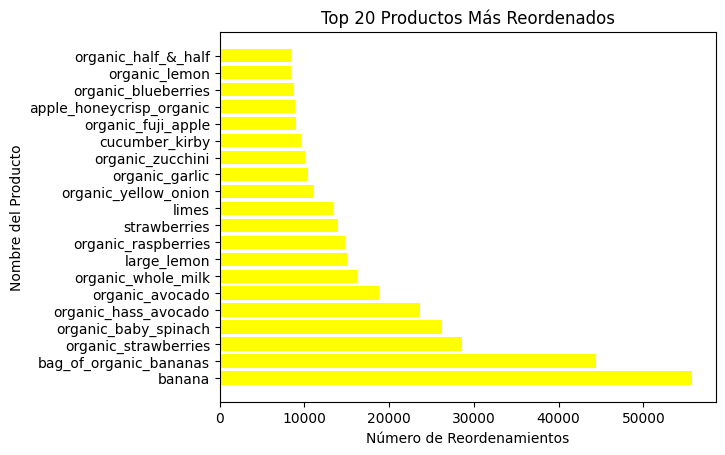

In [87]:
plt.barh(y=df_top_20_names['product_name'], width=df_top_20_names['reorder_count'], color='yellow' )

plt.xlabel('Número de Reordenamientos')
plt.ylabel('Nombre del Producto')
plt.title('Top 20 Productos Más Reordenados')

plt.show()

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [114]:
# Total de pedidos por producto
total_orders = df_order_products.groupby('product_id').size()
print("Ordenes totales: \n", total_orders)

Ordenes totales: 
 product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Length: 45573, dtype: int64


In [115]:
# Total de reordenaciones por producto
total_reorders = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size()
print("Total de reordenaciones por producto", total_reorders)

Total de reordenaciones por producto product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Length: 36228, dtype: int64


In [116]:
# Tasa de repetición
reorder_rate = (total_reorders / total_orders)
print()
# Producto que no aparece en total_reorders, no hay valor para ahcer la division
reorder_rate = (total_reorders / total_orders).fillna(0)
print()
print("Taza de reorden: \n", reorder_rate)
print()
# Asignacion de product_id como columna 
reorder_rate = reorder_rate.reset_index()
reorder_rate.columns = ['product_id', 'reorder_rate']
print("Taza de reorden: \n", reorder_rate)
print()

# Cruzamos para ver nombres
reorder_rate = reorder_rate.merge(df_products[['product_id', 'product_name']], on='product_id')
print("Taza de reorden: \n", reorder_rate.head())



Taza de reorden: 
 product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Length: 45573, dtype: float64

Taza de reorden: 
        product_id  reorder_rate
0               1      0.564286
1               2      0.000000
2               3      0.738095
3               4      0.510204
4               7      0.500000
...           ...           ...
45568       49690      0.800000
45569       49691      0.430556
45570       49692      0.416667
45571       49693      0.440000
45572       49694      0.333333

[45573 rows x 2 columns]

Taza de reorden: 
    product_id  reorder_rate                                       product_name
0           1      0.564286                         chocolate_sandwich_cookies
1           2      0.000000                                   all_seasons_salt
2           3      0.738095               robust_gold

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [107]:
#  Hay que juntar order_products y instacart_orders para saber quién es el user_id

# Unir productos con pedidos para tener user_id
df_order_products_users = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']], on='order_id')
display(df_order_products_users.sample(25).style.apply(zebra_rows, axis=1))
print()

# Total de productos pedidos por usuario
total_user_orders = df_order_products_users.groupby('user_id').size()
print(total_user_orders.sample(25))
print()

# Total de productos reordenados por usuario
total_user_reorders = df_order_products_users[order_products_users['reordered'] == 1].groupby('user_id').size()
print(total_user_reorders.sample(25))


,order_id,product_id,add_to_cart_order,reordered,user_id
1743067,1098866,48679,7,1,23991
2667722,2055855,42697,15,0,8286
1549673,738445,14678,9,1,108302
189278,1317051,31981,1,1,114457
2506206,934705,36994,4,1,174903
1548057,3253373,39275,4,0,59550
2071976,3075509,49621,20,0,76866
1533587,2031214,45763,8,1,124341
3568887,824958,22282,5,1,117752
1811789,407491,13252,19,0,85829



user_id
145945      8
128447      5
192031     12
141807     31
122467     12
64899      10
92752      54
31102      30
108112     10
199278    103
81037      11
137428     65
20753      23
46220      38
47477       6
39215      72
128727     41
177842     29
81532      45
83833      36
136620      3
21008     211
99568      55
81044       4
166797     14
dtype: int64

user_id
89877     10
36592      1
35987     20
61414     90
987        7
92234     51
24362     77
136379     7
156732    37
19228      9
50876     17
177719     5
2982       9
62783     20
125888    14
126515    31
68145      5
117031    27
118022     5
125094     2
30068      1
121681     4
89583      5
96970     32
47966     37
dtype: int64


In [117]:
# Tasa de repetición por usuario
user_reorder_rate = (total_user_reorders / total_user_orders).fillna(0).reset_index()
user_reorder_rate.columns = ['user_id', 'user_reorder_rate']

print("Tasa de repeticion por usuario: \n", user_reorder_rate.head())

Tasa de repeticion por usuario: 
    user_id  user_reorder_rate
0        2           0.038462
1        4           0.000000
2        5           0.666667
3        6           0.000000
4        7           0.928571


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [118]:
# Filtrar los primeros productos añadidos
df_first_products = df_order_products[df_order_products['add_to_cart_order'] == 1]
display(df_first_products.head(25).style.apply(zebra_rows, axis=1))

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
33,2291457,27104,1,1
43,3075384,28799,1,1
45,1787676,47672,1,1
54,3266094,12763,1,1
56,1594605,34217,1,1


In [122]:
# Contar los productos más añadidos primero
top_20_first_added = df_first_products['product_id'].value_counts().head(20)
print("Cantidad de los productos mas añadidos primero: \n", top_20_first_added )

Cantidad de los productos mas añadidos primero: 
 product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
22935     1246
Name: count, dtype: int64


In [126]:
# Cruzar IDs con nombres
top_20_first_added = top_20_first_added.to_frame(name='first_added_count').merge(df_products[['product_id', 'product_name']], 
                                                                                 left_index=True, right_on='product_id')

print(top_20_first_added[['product_id', 'product_name', 'first_added_count']])

       product_id                 product_name  first_added_count
24851       24852                       banana              15562
13175       13176       bag_of_organic_bananas              11026
27844       27845           organic_whole_milk               4363
21136       21137         organic_strawberries               3946
47208       47209         organic_hass_avocado               3390
21902       21903         organic_baby_spinach               3336
47765       47766              organic_avocado               3044
19659       19660                 spring_water               2336
16796       16797                 strawberries               2308
27965       27966          organic_raspberries               2024
44631       44632   sparkling_water_grapefruit               1914
49234       49235          organic_half_&_half               1797
47625       47626                  large_lemon               1737
195           196                         soda               1733
38688     

Escribe aquí tus conclusiones

### Conclusion general del proyecto: